# **Arithmetic Operations**

In [ ]:
import torch
import numpy as np

In [ ]:
a = torch.tensor([1,2,3,4])
b = torch.tensor([5,6,7,8])

In [ ]:
# Addition
a+b
torch.add(a, b)
a.add(b)

tensor([ 6,  8, 10, 12])

In [ ]:
a = a+b
a

tensor([ 6,  8, 10, 12])

In [ ]:
a.add_(b) # _ changes the original elements of a
a.add_(b)
a

tensor([16, 20, 24, 28])

In [ ]:
b # b remains the same

tensor([5, 6, 7, 8])

In [ ]:
a = torch.tensor([1,2,3,4])
b = torch.tensor([5,36,17,8])
#Subtraction
# b-a
# torch.sub(a, b)
# b.sub(a)
# b.sub_(a)
b

tensor([ 4, 34, 14,  4])

In [ ]:
#Multiplication
a = torch.tensor([1,2,3,4])
b = torch.tensor([5,6,7,8])
# a*b
# torch.mul(a, b)
# a.mul(b)
b.mul_(a)
b

tensor([ 5, 12, 21, 32])

In [ ]:
#Division
a = torch.tensor([1,2,3,4])
b = torch.tensor([5,6,7,8], dtype=torch.float32)
# a/b
# torch.div(a, b)
# b/a
# b.div(a)
b.div_(a)
b

tensor([5.0000, 3.0000, 2.3333, 2.0000])

In [ ]:
#Power/Exp
a = torch.tensor([1,2,3,4])
b = torch.tensor([5,6,7,8])
a**b
# torch.pow(a, b)
# a.pow(b)
# b.pow_(a)
# b

tensor([    1,    64,  2187, 65536])

In [ ]:
#Remainder
a = torch.tensor([1,2,3,4])
b = torch.tensor([5,6,7,8])
a%b
# torch.remainder(a, b)
# a.remainder(b)
# b.remainder_(a)
# b

tensor([1, 2, 3, 4])

# **Tensor Ops**

In [ ]:
torch.zeros(2,5,3) # depth of 2, 5 rows, 3 columns

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])

In [ ]:
ones = torch.ones(2,4)
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
ones.size()

torch.Size([2, 4])

In [ ]:
ones.dtype # float32 is default dtype

torch.float32

In [ ]:
2**32 # float32 can store this many values

4294967296

In [ ]:
large_ones = torch.ones(2,3, dtype=torch.float64) # can specify data type
large_ones

tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [ ]:
torch.rand(2,3) # random values follow a normal distribution

tensor([[0.2995, 0.4186, 0.8697],
        [0.1746, 0.4580, 0.9015]])

In [ ]:
torch.randint(5, 10, (5,3)) # random integers, no distribution. Need to mention range of numbers and size of tensor

tensor([[9, 9, 9],
        [6, 6, 7],
        [5, 8, 5],
        [9, 5, 6],
        [8, 7, 6]])

In [ ]:
t = torch.randint(5, 10, (4,4))
t

tensor([[5, 9, 7, 8],
        [8, 8, 5, 7],
        [7, 5, 6, 9],
        [6, 6, 7, 5]])

In [ ]:
t.reshape(2,4,2) # 2 x (4,2) tensors. Must conserve the same number of entries. Values remain same

tensor([[[5, 9],
         [7, 8],
         [8, 8],
         [5, 7]],

        [[7, 5],
         [6, 9],
         [6, 6],
         [7, 5]]])

In [ ]:
t.view(2,4,2) # can use either reshape or view!

tensor([[[5, 9],
         [7, 8],
         [8, 8],
         [5, 7]],

        [[7, 5],
         [6, 9],
         [6, 6],
         [7, 5]]])

# **Auto-Grad**

In [ ]:
x = torch.randn(3, requires_grad=True) # will add auto-gradient computing. Only works on floats
y = x.mean()
print(x)
print(y)

tensor([ 1.9994, -1.8071, -0.1153], requires_grad=True)
tensor(0.0256, grad_fn=<MeanBackward0>)


In [ ]:
y.backward() # back propagation, computes gradient of tensor wrt some scalar values
print(x.grad) # gradient value of x wrt y

tensor([0.3333, 0.3333, 0.3333])


In [ ]:
z = (y**2).mean()
z.backward()
print(x.grad) # gradient wrt z

tensor([0.3504, 0.3504, 0.3504])


# **Activity**

In [ ]:
x = torch.randn(3, requires_grad=True)
w = torch.randn(3, requires_grad=True)

y = (x*w).sum()

y.backward() # backward propagation
print(w)
print(w.grad) # gradient of w wrt y

tensor([-0.1204, -1.4839,  0.5621], requires_grad=True)
tensor([ 0.9954, -0.1786,  0.4063])


# **Detaching Gradiants**

In [ ]:
a = torch.randn(2,3)
print(a.requires_grad)
b = (a**2).sum() # sum of a^2
print(b.grad_fn)

a.requires_grad_(True)
print(a.requires_grad)
b = (a**2).sum()
print(b.grad_fn) # has no gradient

# a.requires_grad_(True)
# print(a.requires_grad)

a = a.detach() # remove gradient
print(a.requires_grad)
b = (a**2).sum()
print(b.grad_fn)

False
None
True
False
None


In [ ]:
x = torch.randn(3, requires_grad=True)
w = torch.randn(3, requires_grad=True)

print("W before training:", w)

for epoch in range(5):
  output = (x*w).sum()

  output.backward()

  with torch.no_grad():
    w -= 0.1*w.grad # learning rate x gradient
  print(w.grad)
  print("w = ", w)

  w.grad.zero_() # nullify gradient before we can compute it again

print("W after training:", w)

W before training: tensor([ 1.9013, -2.2662, -0.5864], requires_grad=True)
tensor([ 0.6327,  1.1263, -1.4219])
w =  tensor([ 1.8381, -2.3789, -0.4442], requires_grad=True)
tensor([ 0.6327,  1.1263, -1.4219])
w =  tensor([ 1.7748, -2.4915, -0.3020], requires_grad=True)
tensor([ 0.6327,  1.1263, -1.4219])
w =  tensor([ 1.7115, -2.6041, -0.1598], requires_grad=True)
tensor([ 0.6327,  1.1263, -1.4219])
w =  tensor([ 1.6483, -2.7167, -0.0176], requires_grad=True)
tensor([ 0.6327,  1.1263, -1.4219])
w =  tensor([ 1.5850, -2.8294,  0.1246], requires_grad=True)
W after training: tensor([ 1.5850, -2.8294,  0.1246], requires_grad=True)


## **Loading GPU**

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
a = torch.randn(3,4).to(device)
a


tensor([[-0.6134, -0.8707, -1.8081,  1.2361],
        [ 0.6877,  0.8505, -0.5069,  1.4054],
        [ 2.2499,  0.3544,  0.9884, -1.6319]], device='cuda:0')

# **Basic Neural Network**

In [ ]:
import torch
import numpy as np

# making a made up dataset
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [85, 100, 60],
                   [95, 80, 55],
                   [105, 120, 75],
                   [78, 90, 50],
                   [82, 70, 45]], dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119],
                    [98, 110],
                    [88, 95],
                    [115, 140],
                    [76, 85],
                    [65, 75]], dtype='float32')

In [ ]:
# creating tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 85., 100.,  60.],
        [ 95.,  80.,  55.],
        [105., 120.,  75.],
        [ 78.,  90.,  50.],
        [ 82.,  70.,  45.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 98., 110.],
        [ 88.,  95.],
        [115., 140.],
        [ 76.,  85.],
        [ 65.,  75.]])


In [ ]:
w = torch.randn(3,2, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[ 0.0350, -0.2361],
        [-0.2395, -0.2108],
        [ 0.0212,  0.4522]], requires_grad=True)
tensor([-1.4190,  1.9827], requires_grad=True)


In [ ]:
# Defining Model
def model(x): # x is the features
  # return (x @ w) + b
  return torch.matmul(x,w)+b

#MeanSquareError Loss function
def mse(p1, p2): # recieves prediction 1 and prediction 2
  diff = p1-p2
  return torch.sum(diff**2)/ diff.numel() # mean of sum of squares

# Training step
for i in range(1000):
  preds = model(inputs) # predictions. pass features into model
  loss = mse(preds, targets)
  loss.backward() # back propagate depending on loss
  if i%100 == 99: # after every 99th iteration
    print(loss.item())

  with torch.no_grad():
    w -= w.grad * 0.00001
    b -= b.grad * 0.00001
    w.grad.zero_()
    b.grad.zero_() # nullifying gradients

preds = model(inputs)
loss = mse(preds, targets)
print(loss)

167.01123046875
98.14717102050781
64.65611267089844
48.30774688720703
40.27288055419922
36.274837493896484
34.241607666015625
33.16893768310547
32.56963348388672
32.20702362060547
tensor(32.2041, grad_fn=<DivBackward0>)


# **Basic Neural Network with Built-in functions**

> Using Pytorch



In [ ]:
import torch
import numpy as np
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [85, 100, 60],
                   [95, 80, 55],
                   [105, 120, 75],
                   [78, 90, 50],
                   [82, 70, 45]], dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119],
                    [98, 110],
                    [88, 95],
                    [115, 140],
                    [76, 85],
                    [65, 75]], dtype='float32')
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)


tensor_ds = TensorDataset(inputs, targets) # shows the data set
tensor_dl = DataLoader(tensor_ds, batch_size=5, shuffle=True) # only loads 5 records of data into the memory at a time

next(iter(tensor_dl))

[tensor([[ 78.,  90.,  50.],
         [ 73.,  67.,  43.],
         [ 87., 134.,  58.],
         [ 69.,  96.,  70.],
         [ 91.,  88.,  64.]]),
 tensor([[ 76.,  85.],
         [ 56.,  70.],
         [119., 133.],
         [103., 119.],
         [ 81., 101.]])]

In [ ]:
#Replacing Model with built-in function
class SimpleNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(3, 4) # input layer, recieves 3 inputs and gives 4 outputs
    self.act1 = nn.ReLU() # built in activation function
    self.linear2 = nn.Linear(4, 2) # second layer, 4 inputs, 2 outputs

  def forward(self, x): # self and features
    x = self.linear1(x)
    x = self.act1(x)
    x = self.linear2(x)
    return x

model = SimpleNN()

# for name, params in model.named_parameters():
#   print("Name:", name)
#   print("Param", params)


#Replacing MSE with built-in function
# mse = torch.nn.MSELoss() # meansquarerror
mae = torch.nn.L1Loss() # meanabsoluteerror

#Optimiser
opt = torch.optim.Adam(model.parameters(), lr = 0.00001) # Adam optimiser

# Training step
def fit(num_epochs, model, loss_fn, opt): # opt = optimiser
  for epoch in range(num_epochs):
    preds = model(inputs)
    loss = loss_fn(preds, targets)

    loss.backward()
    if epoch%100 == 99:
      print(loss.item())

    opt.step() # updates weightd and bias
    opt.zero_grad() # nullifying gradient

# Another optimiser
opt_SGD = torch.optim.SGD(model.parameters(), lr = 0.00001) # stochastic gradient decent

# Training step
def fit_SGD(num_epochs, model, loss_fn, opt):
  for epoch in range(num_epochs):
    for xb, yb in tensor_dl: # for features and labels in this data batch
      preds = model(xb)
      loss = loss_fn(preds, yb)

      loss.backward()
      opt.step()
      opt.zero_grad()
    if epoch%100 == 99:
      print(loss.item())



fit(1000, model, mae, opt)
# fit_SGD(1000, model, mae, opt_SGD)
preds = model(inputs)
print(preds)

100.26191711425781
100.12494659423828
99.99231719970703
99.86041259765625
99.72904968261719
99.59820556640625
99.46784973144531
99.33929443359375
99.21192932128906
99.08494567871094
tensor([[ -5.8854,  -9.7724],
        [ -7.8236, -13.7316],
        [ -8.9931, -15.8992],
        [-13.2739,   4.4377],
        [ -7.6780, -13.4617],
        [ -7.9172, -13.9051],
        [ -7.0362, -11.1014],
        [ -9.5750, -16.9777],
        [ -7.0891, -12.3704],
        [ -6.0961,  -9.5243]], grad_fn=<AddmmBackward0>)


# **Iris Species ANN**

In [ ]:
import torch
import numpy as np
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
iris_df = pd.read_csv(url)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# splitting data into features and labels
X = iris_df.drop('species', axis=1).values


In [ ]:
# Change last column from strings to integers
iris_df['species'] = iris_df['species'].replace('setosa', 0)
iris_df['species'] = iris_df['species'].replace('versicolor', 1)
iris_df['species'] = iris_df['species'].replace('virginica', 2)

Y = iris_df.species.values # outputs


<ipython-input-4-9e3b79c4ac57>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris_df['species'] = iris_df['species'].replace('virginica', 2)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 41) # splitting data into x_train and x_test (15% test)

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
tensor_ds = TensorDataset(X_train, Y_train) # shows the data set
tensor_dl = DataLoader(tensor_ds, batch_size=5, shuffle=True)
next(iter(tensor_dl))

[tensor([[6.5000, 3.0000, 5.8000, 2.2000],
         [6.9000, 3.1000, 5.1000, 2.3000],
         [5.1000, 3.8000, 1.9000, 0.4000],
         [4.4000, 2.9000, 1.4000, 0.2000],
         [5.7000, 4.4000, 1.5000, 0.4000]]),
 tensor([2, 2, 0, 0, 0])]

1.131937026977539
0.4708400368690491
0.4040883481502533
0.23573879897594452
0.06685807555913925
0.041723765432834625
0.13947582244873047
0.016536038368940353
0.17088286578655243
0.006725451443344355


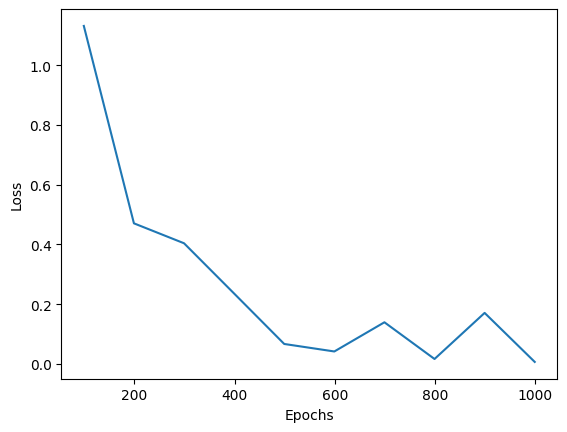

tensor([[ -6.4474,   4.1001,   7.1229],
        [ -9.1272,   3.8905,  10.1815],
        [ -8.4637,   5.0334,   9.5017],
        [ -1.6537,   5.6037,   1.7316],
        [ -7.1056,   4.7235,   7.9221],
        [  0.9274,   6.1311,  -1.1912],
        [ -5.1611,   4.7441,   5.6933],
        [ -1.2030,   5.7464,   1.2248],
        [ -6.0525,   4.7639,   6.7171],
        [ -9.2333,   4.2757,  10.3306],
        [ -4.8003,   4.7987,   5.2834],
        [ 14.8954,   9.0401, -17.0050],
        [ 13.0738,   7.9522, -14.9929],
        [  1.2535,   5.2625,  -1.6270],
        [ 13.8254,   8.7002, -15.8019],
        [ -4.4311,   5.0187,   4.8756],
        [ 13.9993,   8.5049, -16.0152],
        [ -5.9143,   4.3984,   6.5326],
        [ 14.2407,   8.6490, -16.2818],
        [ 12.1647,   7.5266, -13.9804],
        [  0.9832,   5.6100,  -1.2922],
        [ -8.0820,   4.6102,   9.0339],
        [ 14.1516,   8.7575, -16.1719],
        [ 13.8757,   8.4311, -15.8786],
        [  1.7708,   5.9936,  -2.1683],


In [ ]:
#Replacing Model with built-in function
class DNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(4, 6) # input layer
    self.act1 = nn.ReLU() # built in activation function
    self.linear2 = nn.Linear(6, 4) # second layer
    self.act2 = nn.ReLU()
    self.linear3 = nn.Linear(4, 3) # third layer

  def forward(self, x): # self and features
    x = self.linear1(x)
    x = self.act1(x)
    x = self.linear2(x)
    X = self.act2(x)
    x = self.linear3(x)
    return x

model = DNN()

#for name, params in model.named_parameters():
  #print("Name:", name)
  #print("Param", params)


#Replacing MSE with built-in function
# mse = torch.nn.MSELoss() # meansquarerror
# mae = torch.nn.L1Loss() # meanabsoluteerror
ent = torch.nn.CrossEntropyLoss()

#Optimiser
opt = torch.optim.Adam(model.parameters(), lr = 0.00001) # Adam optimiser

# storing losses and epochs for plotting a graph
losses = []
epochs_lst = []

# Training step
def fit(num_epochs, model, loss_fn, opt): # opt = optimiser
  for epoch in range(num_epochs):
    preds = model(inputs)
    loss = loss_fn(preds, targets)

    loss.backward()
    if epoch%100 == 99:
      print(loss.item())

    opt.step() # updates weightd and bias
    opt.zero_grad() # nullifying gradient

# Another optimiser
opt_SGD = torch.optim.SGD(model.parameters(), lr = 0.001) # stochastic gradient decent

# Training step
def fit_SGD(num_epochs, model, loss_fn, opt, tensor_dl):
  for epoch in range(num_epochs):
    for xb, yb in tensor_dl: # for features and labels in this data batch
      preds = model(xb)
      loss = loss_fn(preds, yb)

      loss.backward()
      opt.step()
      opt.zero_grad()
    if epoch%100 == 99: # every 100 epochs
      print(loss.item())
      losses.append(loss.item())
      epochs_lst.append(epoch)

def drawGraph(losses, epoches_lst):
  plt.plot(epochs_lst, losses)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.show()

# fit(1000, model, mae, opt)
fit_SGD(1000, model, ent, opt_SGD, tensor_dl)
drawGraph(losses, epochs_lst)
preds = model(X_test)
print(preds)

In [ ]:
# Its giving the prediction of each label and how confident it is. Pick the one it is most confident in
preds_new = torch.argmax(preds, dim=1) # pick maximum argument (one with highest probability)
labels = {0: "setosa", 1: "versicolor", 2: "virginica"} # dictionary
for i in range(preds_new.numel()):
  print(labels[preds_new[i].item()])

virginica
virginica
virginica
versicolor
virginica
versicolor
virginica
versicolor
virginica
virginica
virginica
setosa
setosa
versicolor
setosa
versicolor
setosa
virginica
setosa
setosa
versicolor
virginica
setosa
setosa
versicolor
versicolor
versicolor
versicolor
setosa
versicolor


In [ ]:
# Value by values comparrison of prediction and actual targets
pd.DataFrame({'preds': preds_new.numpy(), 'labels': Y_test.numpy()})

,preds,labels
0,2,2
1,2,2
2,2,2
3,1,1
4,2,2
5,1,1
6,2,2
7,1,1
8,2,2
9,2,2


# **Deep Neural Network for IRIS Dataset**

In [ ]:
import torch
import numpy as np
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
iris_df = pd.read_csv(url)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# Change last column from strings to integers
iris_df['species'] = iris_df['species'].replace('setosa', 0)
iris_df['species'] = iris_df['species'].replace('versicolor', 1)
iris_df['species'] = iris_df['species'].replace('virginica', 2)

# X is all columns except the species
X = iris_df.drop('species', axis=1).values
y = iris_df['species'].values

<ipython-input-11-f72883491b97>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris_df['species'] = iris_df['species'].replace('virginica', 2)


In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=41)

In [ ]:
# Convert to tensors
# Need to calculate gradients so set to float tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
X_train

In [ ]:
# Convert labels to tensor
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
train_ds = TensorDataset(X_train, y_train)
batch_size = 15
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
next(iter(train_dl))

[tensor([[7.1000, 3.0000, 5.9000, 2.1000],
         [5.1000, 3.8000, 1.6000, 0.2000],
         [7.2000, 3.0000, 5.8000, 1.6000],
         [5.4000, 3.9000, 1.3000, 0.4000],
         [7.9000, 3.8000, 6.4000, 2.0000],
         [6.6000, 2.9000, 4.6000, 1.3000],
         [5.7000, 4.4000, 1.5000, 0.4000],
         [5.1000, 2.5000, 3.0000, 1.1000],
         [6.0000, 2.9000, 4.5000, 1.5000],
         [6.7000, 3.1000, 4.7000, 1.5000],
         [4.4000, 3.2000, 1.3000, 0.2000],
         [5.4000, 3.7000, 1.5000, 0.2000],
         [6.8000, 2.8000, 4.8000, 1.4000],
         [7.2000, 3.2000, 6.0000, 1.8000],
         [4.6000, 3.1000, 1.5000, 0.2000]]),
 tensor([2, 0, 2, 0, 2, 1, 0, 1, 1, 1, 0, 0, 1, 2, 0])]

0.9880470633506775
0.7694223523139954
0.6692188382148743
0.7455676794052124
0.6409342288970947
0.6358434557914734
0.5680059790611267
0.5931703448295593
0.5441821217536926
0.46215203404426575


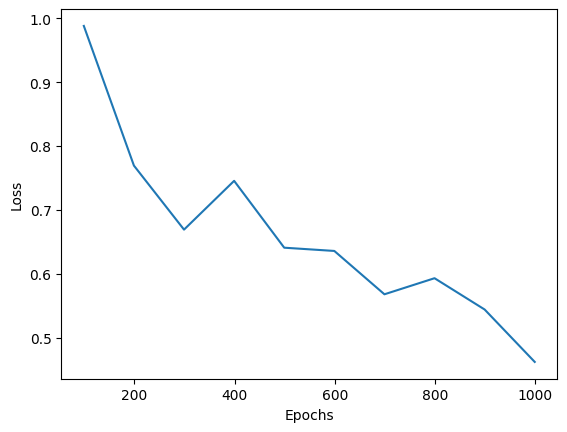

tensor([[-3.3918,  1.4222,  1.8715],
        [-4.0027,  1.6981,  2.3010],
        [-4.4587,  1.8907,  2.6281],
        [-2.5622,  1.0585,  1.2828],
        [-3.7766,  1.5956,  2.1421],
        [-1.9332,  0.7782,  0.8388],
        [-3.1548,  1.3206,  1.7022],
        [-2.3607,  0.9748,  1.1376],
        [-3.4244,  1.4418,  1.8920],
        [-4.2157,  1.7930,  2.4513],
        [-3.0439,  1.2753,  1.6218],
        [ 0.8554, -0.5039, -1.1108],
        [ 0.8554, -0.5039, -1.1108],
        [-1.3267,  0.5143,  0.4075],
        [ 0.8170, -0.4626, -1.0955],
        [-3.2311,  1.3521,  1.7573],
        [ 0.8359, -0.4829, -1.1030],
        [-3.3310,  1.3994,  1.8264],
        [ 0.8554, -0.5039, -1.1108],
        [ 0.8294, -0.4760, -1.1004],
        [-1.6992,  0.6749,  0.6731],
        [-3.9827,  1.6890,  2.2869],
        [ 0.8357, -0.4826, -1.1029],
        [ 0.8554, -0.5039, -1.1108],
        [-1.4769,  0.5818,  0.5133],
        [-2.0846,  0.8393,  0.9487],
        [-2.6061,  1.0799,  1.3130],
 

In [ ]:
class DNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(4, 6)
    self.act1 = nn.ReLU()
    self.linear2 = nn.Linear(6, 4)
    self.act2 = nn.ReLU()
    self.linear3 = nn.Linear(4, 3)

  def forward(self, x):
    x = self.linear1(x)
    x = self.act1(x)
    x = self.linear2(x)
    x = self.act2(x)
    x = self.linear3(x)
    return x

lr = 0.001
model = DNN()
mse = torch.nn.CrossEntropyLoss()
opt_SGD = torch.optim.SGD(model.parameters(), lr = lr)
losses = []
epochs_lst = []
# Training step
def fit(num_epochs, model, loss_fn, opt, train_dl):
  for epoch in range(num_epochs):
    for xb, yb in train_dl:
      preds = model(xb)
      loss = loss_fn(preds, yb)
      loss.backward()
      opt.step()
      opt.zero_grad()
    if epoch%100 == 99:
      print(loss.item())
      losses.append(loss.item())
      epochs_lst.append(epoch)


def drawGraph(losses, epoches_lst):
  plt.plot(epochs_lst, losses)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.show()


fit(1000, model, mse, opt_SGD, train_dl)
drawGraph(losses, epochs_lst)
preds = model(X_test)
print(preds)

In [ ]:
preds_new = torch.argmax(preds, dim=1)
labels = {0: "setosa", 1: "versicolor", 2: "virginica"}
for i in range(preds_new.numel()):
  print(labels[preds_new[i].item()])

virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
setosa
setosa
virginica
setosa
virginica
setosa
virginica
setosa
setosa
virginica
virginica
setosa
setosa
virginica
virginica
virginica
virginica
setosa
virginica


In [ ]:
pd.DataFrame({'preds': preds_new.numpy(), 'labels': y_test.numpy()})

,preds,labels
0,2,2
1,2,2
2,2,2
3,2,1
4,2,2
5,2,1
6,2,2
7,2,1
8,2,2
9,2,2


# **CNN**

Convolution Process using numpy

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Text(0.5, 1.0, 'Max Pooled Image')

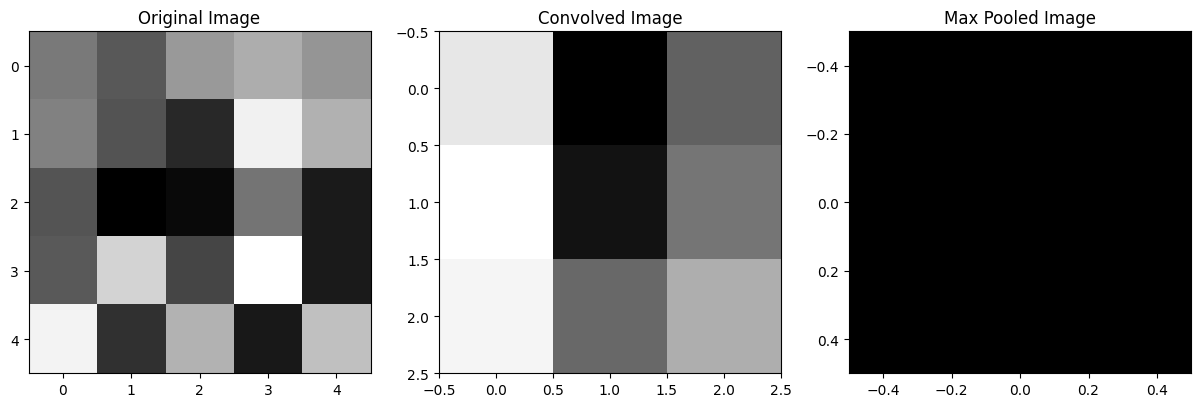

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Function to perform convolution
def convolve2d(image, kernel):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape

    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1

    output = np.zeros((output_height, output_width)) # output empty matrix

    for i in range(output_height):
        for j in range(output_width):
            patch = image[i:i+kernel_height, j:j+kernel_width] # window that kernel sits on
            output[i, j] = np.sum(patch * kernel) # sum of the product of patch and kernel

    return output


# Function to perform max pooling
def max_pooling(image, pool_size):
    pool_height, pool_width = pool_size
    image_height, image_width = image.shape

    output_height = image_height // pool_height
    output_width = image_width // pool_width

    output = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            patch = image[i*pool_height:(i+1)*pool_height, j*pool_width:(j+1)*pool_width]
            output[i, j] = np.max(patch)

    return output

image = np.random.rand(5,5)
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])
convolved_image = convolve2d(image, kernel)
max_pooling_img = max_pooling(convolved_image, (2, 2))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(convolved_image, cmap='gray')
axes[1].set_title('Convolved Image')
axes[2].imshow(max_pooling_img, cmap='gray')
axes[2].set_title('Max Pooled Image')



Text(0.5, 1.0, 'Max Pooled Image')

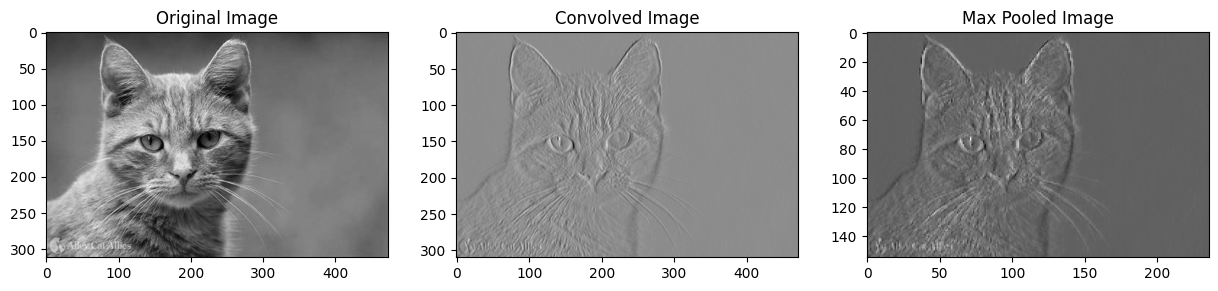

In [ ]:
image_path = r'/content/drive/MyDrive/Deep learning/cat.jpg'
image = Image.open(image_path).convert('L')  # Convert to grayscale
image = np.array(image) # create numpy array of image

# Define a kernel (e.g., edge detection)
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

# Apply convolution
convolved_image = convolve2d(image, kernel)

max_pooling_img = max_pooling(convolved_image, (2, 2))

# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(convolved_image, cmap='gray')
axes[1].set_title('Convolved Image')
axes[2].imshow(max_pooling_img, cmap='gray')
axes[2].set_title('Max Pooled Image')

# **Convolution and Pooling using Pytorch**

Input Image Shape: torch.Size([1, 1, 312, 474])


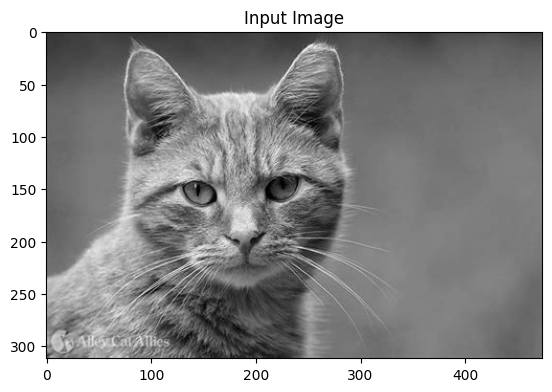

Input Image Shape: torch.Size([1, 1, 312, 474])


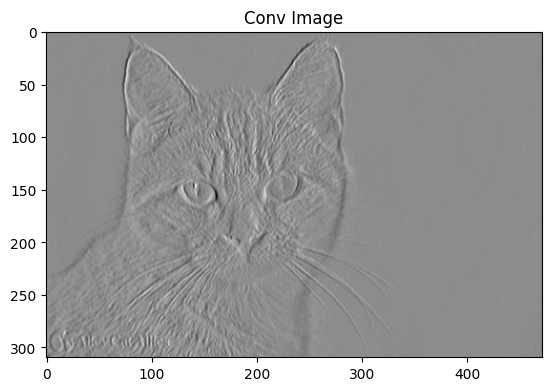

Conv Image Shape: torch.Size([1, 1, 310, 472])


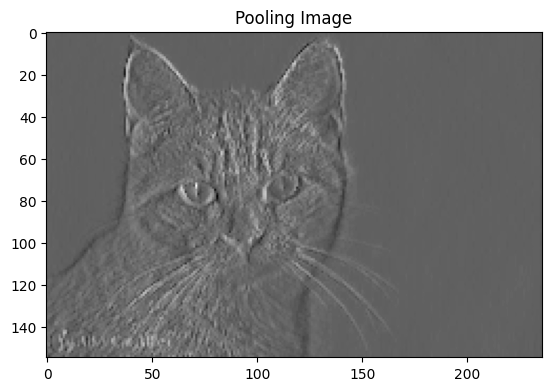

Pooling Image Shape: torch.Size([1, 1, 155, 236])


In [ ]:
import torch
import torch.nn as nn
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
def load_image(image_path, image_size=(128, 128)):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    # image = image.resize(image_size)             # Resize the image
    image = np.array(image)                      # Convert to numpy array
    image = torch.tensor(image, dtype=torch.float32)  # Convert to torch tensor
    image = image.unsqueeze(0).unsqueeze(0)      # Add batch and channel dimensions
    return image

# Path to the image
image_path = r"/content/drive/MyDrive/Deep learning/cat.jpg"

# Load the image
input_image = load_image(image_path)
print("Input Image Shape:", input_image.shape)

# Define a convolutional layer
conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=0) # in_channel = 1 for grayscale, 3 for RGB. Stride is the step size of kernel.

# Set a specific filter for the convolutional layer
conv_layer.weight = nn.Parameter(torch.tensor([[[[1, 0, -1],
                                                 [1, 0, -1],
                                                 [1, 0, -1]]]], dtype=torch.float32))

# Perform convolution
conv_output = conv_layer(input_image)

# Perform max-pooling
max_pooling_layer = nn.MaxPool2d(kernel_size=2, stride=2)
max_pooling_img = max_pooling_layer(conv_output)

# Display the image
plt.imshow(input_image[0, 0].numpy(), cmap='gray')
plt.title("Input Image")
plt.show()
print("Input Image Shape:", input_image.shape)

# Display the image
plt.imshow(conv_output[0, 0].detach().numpy(), cmap='gray')
plt.title("Conv Image")
plt.show()
print("Conv Image Shape:", conv_output.shape)

# Display the image
plt.imshow(max_pooling_img[0, 0].detach().numpy(), cmap='gray')
plt.title("Pooling Image")
plt.show()
print("Pooling Image Shape:", max_pooling_img.shape)

# CNN for **Brain** Tumor Detection Using Pytorch

In [ ]:
!pip install split-folders

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import os
import torch
from PIL import Image
from torch.utils.data import Dataset
import torchvision
import torchvision.transforms as transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn as nn
from torchvision import utils
from torchvision.datasets import ImageFolder
import splitfolders
import torch.nn.functional as F
import pathlib
from torch import optim

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

# Step 2: Specify the path to the zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/Deep learning/Brain Tumor Data Set.zip'
extract_dir = '/content/drive/MyDrive/Deep learning/Brain Tumor Dataset'

# Ensure the extract directory exists
os.makedirs(extract_dir, exist_ok=True)

# Step 3: Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [ ]:
os.listdir("/content/drive/MyDrive/Deep learning/Brain Tumor Dataset/Brain Tumor Data Set")

['Brain Tumor', 'Healthy']

In [ ]:
# Making a new directory for brain tumor outside of drive
data_dir = "/content/drive/MyDrive/Deep learning/Brain Tumor Dataset/Brain Tumor Data Set"
data_dir = pathlib.Path(data_dir)

splitfolders.ratio(data_dir, output='brain', seed=41, ratio=(0.8, 0.2)) # train test split

Copying files: 30 files [00:01, 33.85 files/s]

In [ ]:
data_dir = "/content/brain"
data_dir = pathlib.Path(data_dir)

In [ ]:
transform = transforms.Compose(
    [
        transforms.Resize((128,128)),  # ensure all images are the same size
        transforms.RandomHorizontalFlip(p=0.5), # with a probability of 0.5, flip some of the images to make algortihm robust to orientation
        transforms.RandomVerticalFlip(p=0.5),
        transforms.RandomRotation(30), # randomly rotate images by 30 degs
        transforms.ToTensor(), # convert datapoint to tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # ensure all images are aligned to the same mean and sd to make algorithm work better
    ]
)

In [ ]:
train_set = torchvision.datasets.ImageFolder(data_dir.joinpath('train'), transform=transform)
train_set.transform # get healthy and tumor training set and also transform
val_set = torchvision.datasets.ImageFolder(data_dir.joinpath('val'), transform=transform)
val_set.transform

Compose(
    Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [ ]:
print(train_set)

Dataset ImageFolder
    Number of datapoints: 3679
    Root location: /content/brain/train
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


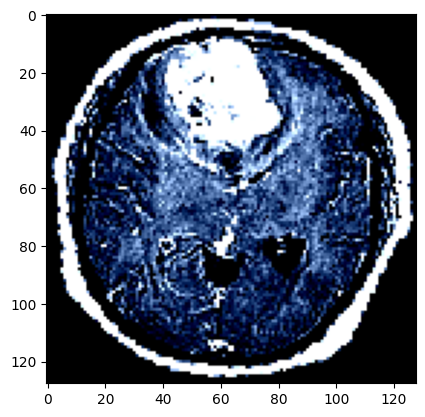

In [ ]:
img, label = train_set[1000]
plt.imshow(img.permute(1,2,0)) # convert to BGR

In [ ]:
batch_size = 64 # deal with a batch of 64 every iteration
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)

In [ ]:
next(iter(val_loader))[0].shape # each batch has 64 images, with 3 channles and 128 rows and columns

torch.Size([64, 3, 128, 128])

In [ ]:
class CNNModel(nn.Module):
  def __init__(self):
    super(CNNModel, self).__init__()

    #Conv 1
    self.cnv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1, padding=0) #128-5+1=124 output image

    #Max Pool 1
    self.maxpool1 = nn.MaxPool2d(kernel_size=2) #124/2 = 64

    #Conv 2
    self.cnv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0) #60

    #Max Pool 2
    self.maxpool2 = nn.MaxPool2d(kernel_size=2) #30

    #Conv 3
    self.cnv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=0) #26

    #Max Pool 3
    self.maxpool3 = nn.MaxPool2d(kernel_size=2) #13

    #Conv 4
    self.cnv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=0) #9

    #Max Pool 4
    self.maxpool4 = nn.MaxPool2d(kernel_size=2) #4

    #Activation Function
    self.leakyRelu = nn.LeakyReLU()

    #Fully connected Layer 1
    self.fc1 = nn.Linear(128*4*4, 1024) # 128 x width x height

    #Fully connected Layer 2
    self.fc2 = nn.Linear(1024, 2) # input 1024 and output 2 (2 classes)

# convolution and pooling
  def forward(self, x):
    #Layer 1
    out = self.leakyRelu(self.cnv1(x)) # activation function
    out = self.maxpool1(out)

    #Layer 2
    out = self.leakyRelu(self.cnv2(out))
    out = self.maxpool2(out)

    #Layer 3
    out = self.leakyRelu(self.cnv3(out))
    out = self.maxpool3(out)

    #Layer 4
    out = self.leakyRelu(self.cnv4(out))
    out = self.maxpool4(out)

    #flatten
    out = out.view(out.size(0), -1) # size of rows - 1

    # Linear Function
    out = self.leakyRelu(self.fc1(out))
    out = self.fc2(out) # np activation at the final layer. doing loss function

    return out



In [ ]:
# Training CNN
num_epochs = 10
model = CNNModel()
error = nn.CrossEntropyLoss()

lr = 0.001
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5) #

In [ ]:
train_loss_list = [] # stores training error
val_loss_list = [] # stores validation error
accuracy_list = []

for epoch in range(num_epochs):
  train_loss = 0
  val_loss = 0
  for i, (images, labels) in enumerate(train_loader): # images and labels in 1 batch (64 images)

    optimizer.zero_grad()
    outputs = model(images)
    loss = error(outputs, labels)
    train_loss+=loss.item()
    loss.backward()
    optimizer.step()
    print("Loss in Iteration:", i, ":", loss.item())
  total = 0
  correct = 0
  for images, labels in val_loader:
    outputs = model(images)
    v_loss = error(outputs, labels)
    val_loss+=v_loss.item()
    predicted = torch.max(outputs.data, 1)[1]

    total+=len(labels)
    correct+=(predicted==labels).sum()


  scheduler.step(val_loss/len(val_loader))
  accuracy = 100*correct/float(total)
  train_loss_list.append(train_loss/len(train_loader)) # average training loss in that epoch
  val_loss_list.append(val_loss/len(val_loader)) # average loss in that epoch
  accuracy_list.append(accuracy)
  print("Epoch:{}  Loss:{}  Accuracy:{}%".format(epoch, train_loss/len(train_loader), accuracy))

Loss in Iteration: 0 : 0.6925190091133118
Loss in Iteration: 1 : 0.8075934052467346
Loss in Iteration: 2 : 0.7469037771224976
Loss in Iteration: 3 : 0.7188485860824585
Loss in Iteration: 4 : 0.6925361156463623
Loss in Iteration: 5 : 0.6921932697296143
Loss in Iteration: 6 : 0.6910830140113831
Loss in Iteration: 7 : 0.6926337480545044
Loss in Iteration: 8 : 0.6851617693901062
Loss in Iteration: 9 : 0.681389331817627
Loss in Iteration: 10 : 0.6971981525421143
Loss in Iteration: 11 : 0.6849876642227173
Loss in Iteration: 12 : 0.6909060478210449
Loss in Iteration: 13 : 0.6992010474205017
Loss in Iteration: 14 : 0.6846290826797485
Loss in Iteration: 15 : 0.6806758046150208
Loss in Iteration: 16 : 0.6845412254333496
Loss in Iteration: 17 : 0.6825923323631287
Loss in Iteration: 18 : 0.6961506605148315
Loss in Iteration: 19 : 0.6773940324783325
Loss in Iteration: 20 : 0.6588788628578186
Loss in Iteration: 21 : 0.6688560247421265
Loss in Iteration: 22 : 0.6433939933776855
Loss in Iteration: 23 

In [ ]:
train_loss_list

[0.6364173257145388,
 0.49873722164795314,
 0.34460534283827093,
 0.26795976390612536,
 0.2141115878676546,
 0.18532734377116994,
 0.14013415099731807,
 0.1309159786665234,
 0.12914129459010115,
 0.12351758701020274]

In [ ]:
val_loss_list

[0.5150780697663625,
 0.42496505975723264,
 0.2995482216278712,
 0.25126204987366996,
 0.20499796470006307,
 0.17214005142450334,
 0.17156432022651036,
 0.1196344921986262,
 0.128871101886034,
 0.08365473846594493]

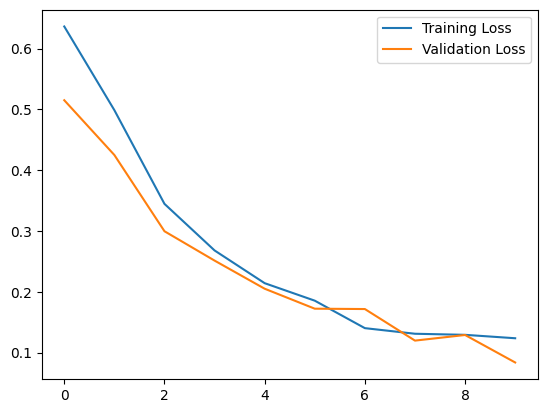

In [ ]:
plt.plot(range(num_epochs), train_loss_list)
plt.plot(range(num_epochs), val_loss_list)
plt.legend(["Training Loss", "Validation Loss"])

In [ ]:
accuracy_list

[tensor(76.9815),
 tensor(81.9761),
 tensor(87.2964),
 tensor(89.3594),
 tensor(92.3996),
 tensor(93.8111),
 tensor(93.8111),
 tensor(96.3084),
 tensor(95.4397),
 tensor(96.4169)]

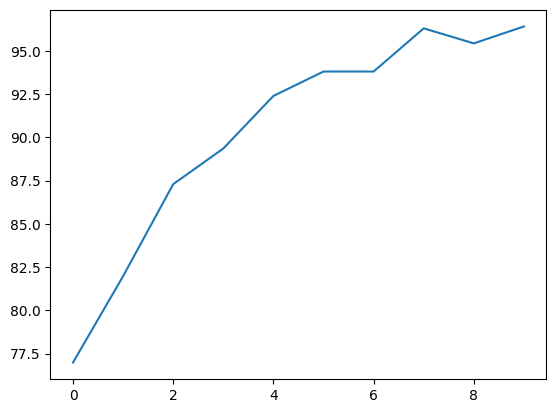

In [ ]:
plt.plot(range(num_epochs), accuracy_list)

Text(0.5, 1.0, '1')

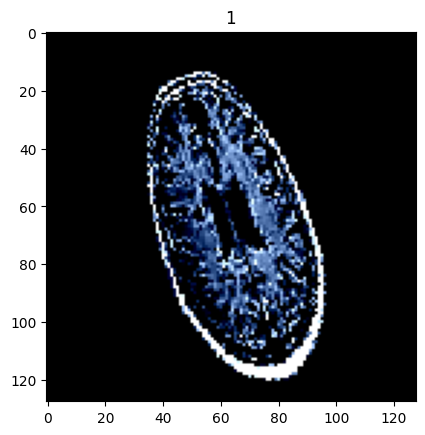

In [ ]:
# original label
img, label = val_set[888]
plt.imshow(img.permute(1,2,0))
plt.title(label)

In [ ]:
image = img.unsqueeze(0) # add more dimensions

with torch.no_grad():
  output = model(image)

_, pred = torch.max(output, 1)
print("Predicted Output:", pred.item())

Predicted Output: 1
